In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

%pylab inline
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

Populating the interactive namespace from numpy and matplotlib


In [76]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [77]:
(newsgroups_train['target_names'])

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [78]:
len(newsgroups_train['target'])

11314

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=100)
cv.fit(newsgroups_train['data'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=100, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [80]:
X_train = cv.transform(newsgroups_train['data'])
X_test = cv.transform(newsgroups_test['data'])

y_train = newsgroups_train['target']
y_test = newsgroups_test['target']

In [81]:
cv.get_feature_names()

['about',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 'article',
 'as',
 'at',
 'ax',
 'be',
 'because',
 'been',
 'but',
 'by',
 'ca',
 'can',
 'com',
 'could',
 'do',
 'does',
 'don',
 'edu',
 'even',
 'for',
 'from',
 'get',
 'good',
 'had',
 'has',
 'have',
 'he',
 'his',
 'host',
 'how',
 'if',
 'in',
 'is',
 'it',
 'just',
 'know',
 'like',
 'lines',
 'max',
 'may',
 'me',
 'more',
 'my',
 'new',
 'nntp',
 'no',
 'not',
 'of',
 'on',
 'one',
 'only',
 'or',
 'organization',
 'other',
 'out',
 'people',
 'posting',
 're',
 'should',
 'so',
 'some',
 'subject',
 'than',
 'that',
 'the',
 'their',
 'them',
 'then',
 'there',
 'these',
 'they',
 'think',
 'this',
 'time',
 'to',
 'university',
 'up',
 'us',
 'use',
 'was',
 'we',
 'well',
 'were',
 'what',
 'when',
 'which',
 'who',
 'will',
 'with',
 'would',
 'writes',
 'you',
 'your']

In [82]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [83]:
train_mask = (y_train <= 1)
test_mask = (y_test <= 1)

X_train = X_train[train_mask]
X_test = X_test[test_mask]

y_train = y_train[train_mask]
y_test = y_test[test_mask]

In [84]:
np.sum(y_test)

389

In [85]:
X_test

<708x100 sparse matrix of type '<class 'numpy.int64'>'
	with 28551 stored elements in Compressed Sparse Row format>

In [86]:
print(X_train.todense())

[[2 0 0 ... 1 1 0]
 [0 1 0 ... 1 2 0]
 [1 5 0 ... 1 2 1]
 ...
 [0 2 1 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 1 1 0]]


In [87]:
%%time
clf = LogisticRegression(random_state=134).fit(X_train, y_train)

CPU times: user 85.6 ms, sys: 10.9 ms, total: 96.5 ms
Wall time: 106 ms


/Users/zabegaev99/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [88]:
clf.coef_

array([[ 0.21496666, -0.11383959,  0.73115435,  0.48705912, -0.42260227,
         0.09451934,  0.5982347 ,  0.00847469,  0.15965347, -0.34476009,
         0.45314946,  0.54478156, -0.12166407, -0.23599167, -0.20772448,
         0.30985893, -0.37451345,  1.42639722,  0.11658058, -0.11692129,
         0.11771676, -0.14346196,  0.28399602, -0.11335993, -0.4172264 ,
        -0.32348672,  0.4273733 ,  0.12883359,  0.84223097,  0.13201123,
        -0.00511505,  0.23562993, -0.01588501, -0.78760286, -1.11139627,
         0.0969655 ,  0.11426635, -0.07952562,  0.06413048, -0.08910777,
        -0.05073938,  0.47138806,  0.02094008,  0.4366281 , -0.70061169,
         0.09806981,  0.26838765,  0.33765546, -0.14252641, -0.26548449,
         0.05260584,  0.03484158, -0.32232579, -0.03944962, -0.22840332,
         0.12764826, -0.44253586,  0.65817079, -0.25507539,  0.73322119,
        -0.12170194,  0.53595511, -1.61623043,  0.2752876 , -1.32360602,
         0.08397717, -0.04199174, -0.03222575,  0.7

In [89]:
[(k,v) for k, v in sorted(cv.vocabulary_.items(), key=lambda item: item[1])]

[('about', 0),
 ('all', 1),
 ('also', 2),
 ('am', 3),
 ('an', 4),
 ('and', 5),
 ('any', 6),
 ('are', 7),
 ('article', 8),
 ('as', 9),
 ('at', 10),
 ('ax', 11),
 ('be', 12),
 ('because', 13),
 ('been', 14),
 ('but', 15),
 ('by', 16),
 ('ca', 17),
 ('can', 18),
 ('com', 19),
 ('could', 20),
 ('do', 21),
 ('does', 22),
 ('don', 23),
 ('edu', 24),
 ('even', 25),
 ('for', 26),
 ('from', 27),
 ('get', 28),
 ('good', 29),
 ('had', 30),
 ('has', 31),
 ('have', 32),
 ('he', 33),
 ('his', 34),
 ('host', 35),
 ('how', 36),
 ('if', 37),
 ('in', 38),
 ('is', 39),
 ('it', 40),
 ('just', 41),
 ('know', 42),
 ('like', 43),
 ('lines', 44),
 ('max', 45),
 ('may', 46),
 ('me', 47),
 ('more', 48),
 ('my', 49),
 ('new', 50),
 ('nntp', 51),
 ('no', 52),
 ('not', 53),
 ('of', 54),
 ('on', 55),
 ('one', 56),
 ('only', 57),
 ('or', 58),
 ('organization', 59),
 ('other', 60),
 ('out', 61),
 ('people', 62),
 ('posting', 63),
 ('re', 64),
 ('should', 65),
 ('so', 66),
 ('some', 67),
 ('subject', 68),
 ('than', 69

In [90]:
names = [k for k, v in sorted(cv.vocabulary_.items(), key=lambda item: item[1])]
coef = clf.coef_.ravel()

In [96]:
df = pd.DataFrame(np.array([coef, names]).T, columns=['coef', 'names'])
df.sort_values('coef')[-10:]

,coef,names
6,0.5982347044970174,any
57,0.658170793770505,only
74,0.7261414761965028,then
2,0.7311543460611576,also
59,0.7332211925736779,organization
68,0.7562907830806099,subject
28,0.8422309658652634,get
85,0.9613945423500923,use
82,0.9725324819517049,university
17,1.4263972161810392,ca


In [4]:
! pip3 install eli5

In [2]:
import eli5
eli5.explain_weights(clf, feature_names=names)

ModuleNotFoundError: No module named 'eli5'

# Transform y: 0 to -1

In [152]:
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

In [246]:
def sigma(w, x):
    return 1 / (1 + np.exp(-x.dot(w)))

def L(w, X, y):
    N = w.shape[0]
#     import pdb; pdb.set_trace()
    return 1 / N * np.sum(np.log(1 + np.exp(-y * X.dot(w))))

def dL(w, X, y):
    N = w.shape[0]
#     import pdb; pdb.set_trace()
    return np.array(-1 / N * np.sum(X.T.multiply(y).multiply(1 / (1 + np.exp(-y * X.dot(w)))).multiply(np.exp(-y * X.dot(w))), 
                          axis=1)).ravel()

# def L(w, X, y):
#     N = w.shape[0]
# #     import pdb; pdb.set_trace()
#     return 1 / N * np.sum((y - X.dot(w)) ** 2)

# def dL(w, X, y):
#     N = w.shape[0]
# #     import pdb; pdb.set_trace()
# #     return np.array(-1 / N * np.sum(X.T.multiply(y).multiply(1 / (1 + np.exp(-y * X.dot(w)))).multiply(np.exp(-y * X.dot(w))), 
# #                           axis=1)).ravel()
#     return np.array(-1 / N * np.sum(X.T.multiply(2 * (y - X.dot(w))), axis=1)).ravel()

# Test gradient implementation

In [247]:
def test_dL(w, X, y, mul):
    dw = np.zeros(100)
    L_val = L(w, X, y)
    dL_val = np.zeros(100)
#     import pdb; pdb.set_trace()
    for i in range(100):
        dw[i - 1] = 0
        dw[i] = mul
        dL_val[i] = (L(w + dw, X, y) - L_val) / mul
    print(mul, np.linalg.norm(dL_val - dL(w, X, y)))
#     print(mul, np.linalg.norm(dL_val), np.linalg.norm(dL(w, X, y)))

    
w = np.random.rand(X_train.shape[1]) / 1000
for mul in [1e-8, 1e-7, 1e-6, 1e-5]:
    test_dL(w, X_train, y_train, mul)

1e-08 9.848863810533795e-06
1e-07 0.0001022351419628103
1e-06 0.001022738532950678
1e-05 0.010223288445029326


In [248]:
w = np.zeros(X_train.shape[1]) / 1000
# w = (1 / X_train[0].toarray() + 1e-30)
MAX_ITERS = 1000
accs_train = np.zeros(MAX_ITERS)
accs_test = np.zeros(MAX_ITERS)
lamda = 0.001
for i in range(MAX_ITERS):
    w_next = w - lamda * dL(w, X_train, y_train)
#     import pdb; pdb.set_trace()
    accs_train[i] = accuracy(w_next, X_train, y_train)
    accs_test[i] = accuracy(w_next, X_test, y_test)
    #print(np.linalg.norm(w_next - w), L(w, X_train, y_train), L(w, X_test, y_test))#, accuracy(w_next, X_train, y_train))
    w = w_next
    assert not np.any(w == np.nan)

In [249]:
import matplotlib.pyplot as plt

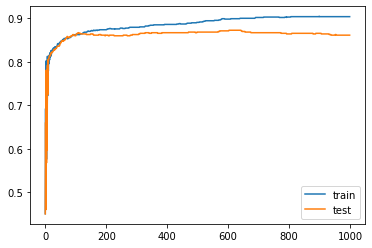

In [250]:
plt.plot(range(MAX_ITERS), accs_train, label='train')
plt.plot(range(MAX_ITERS), accs_test, label='test')
plt.legend()

In [204]:
def model(w, X):
    return np.where(sigma(w, X) > 0.5, 1, -1)

In [208]:
def accuracy(w, X, y):
    return sum(model(w, X) == y) / y.shape[0]

In [209]:
accuracy(w, X_train, y_train), accuracy(w, X_test, y_test)

(0.9041353383458647, 0.8615819209039548)

In [161]:
L(w, X_train[0], y_train[0])

nan

In [164]:
1 / X_train[0].toarray().ravel()

/Users/zabegaev99/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.5 ,  inf,  inf,  inf,  inf,  inf,  inf,  inf, 1.  , 0.5 ,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf, 0.5 ,  inf, 1.  ,
        inf,  inf, 0.5 ,  inf,  inf, 1.  , 1.  ,  inf,  inf,  inf, 1.  ,
        inf,  inf, 1.  ,  inf,  inf, 1.  , 1.  , 0.5 , 1.  , 1.  , 1.  ,
       1.  ,  inf,  inf, 1.  ,  inf,  inf,  inf, 1.  , 1.  ,  inf, 1.  ,
        inf,  inf, 1.  ,  inf, 1.  ,  inf,  inf,  inf, 1.  , 1.  ,  inf,
        inf, 1.  , 1.  ,  inf, 0.5 , 0.25,  inf,  inf,  inf,  inf,  inf,
        inf,  inf, 0.5 ,  inf, 1.  ,  inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf, 1.  ,  inf, 1.  , 1.  ,
        inf])

In [165]:
X_train.toarray()

array([[2, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 2, 0],
       [1, 5, 0, ..., 1, 2, 1],
       ...,
       [0, 2, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]])